In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,\
UpSampling2D,Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

In [2]:
print(X_train.reshape)

<built-in method reshape of numpy.ndarray object at 0x000001DD5E48B260>


In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),\
                       activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,activation='relu',padding='same'))

# 디코딩 부분
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

<function matplotlib.pyplot.show(close=None, block=None)>

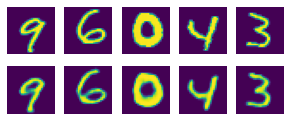

In [4]:
# 전체 구조 확인
autoencoder.summary()

# 컴파일 및 학습
autoencoder.compile(optimizer='adam', loss= 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, 
               validation_data = (X_test, X_test))

# 학습된 결과를 출력
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 삽입
plt.figure(figsize= (7, 2)) #출력될 이미지 크기 결정

for i, image_idx in enumerate(random_test):  #랜덤하게 뽑은 이미지 차례로 나열 
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28)) # 테스트할 이미지 먼저 그대로 출력
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과 다음열에 출력
    ax.axis('off')
    
plt.show

In [5]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, \
Flatten, Reshape, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale= 1./255,
                                  horizontal_flip= True,  # 수평 대칭 이미지를 50%
                                  width_shift_range= 0.1,  # 전체크기의 10% 범위에서 좌우로 
                                  height_shift_range= 0.1, # 마찬가지로 위, 아래 이동 
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(\
        './train', # 학습셋이 있는 폴더의 위치 
        target_size = (150, 150),
        batch_size = 5,
        class_mode = 'binary')

# 테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다. 
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(\
        './test',
        target_size=(150, 150),
        batch_size= 5, 
        class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [6]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다. 

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [7]:
# 모델을 컴파일 합니다. 
model.compile(loss= 'sparse_categorical_crossentropy', \
             optimizer = optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

history = model.fit(
       train_generator,
       steps_per_epoch=30,
       epochs=50,
       validation_data=test_generator,
       validation_steps=10)


C:\Users\user\anaconda3\envs\local\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 11s 285ms/step - loss: 0.7037 - accuracy: 0.4600 - val_loss: 0.6881 - val_accuracy: 0.5400
Epoch 2/50
30/30 [==============================] - 8s 241ms/step - loss: 0.6957 - accuracy: 0.4933 - val_loss: 0.6735 - val_accuracy: 0.6000
Epoch 3/50
30/30 [==============================] - 6s 202ms/step - loss: 0.6925 - accuracy: 0.5133 - val_loss: 0.6832 - val_accuracy: 0.5600
Epoch 4/50
30/30 [==============================] - 6s 195ms/step - loss: 0.6874 - accuracy: 0.5333 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 5/50
30/30 [==============================] - 7s 219ms/step - loss: 0.6812 - accuracy: 0.5933 - val_loss: 0.6721 - val_accuracy: 0.7000
Epoch 6/50
30/30 [==============================] - 8s 271ms/step - loss: 0.6697 - accuracy: 0.6133 - val_loss: 0.6414 - val_accuracy: 0.6600
Epoch 7/50
30/30 [==============================] - 10s 339ms/step - loss: 0.6465 - accuracy: 0.6467 - val_loss: 0.5808 - val_accuracy: 0.9000
Epoc

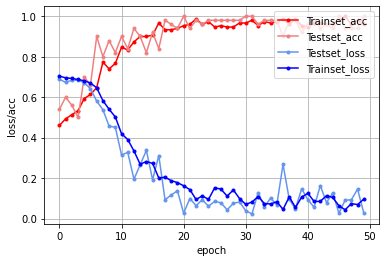

In [8]:
# 결과를 그래프로 표현하는 부분
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

## 2. 전이 학습으로 모델 성능 극대화하기

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________

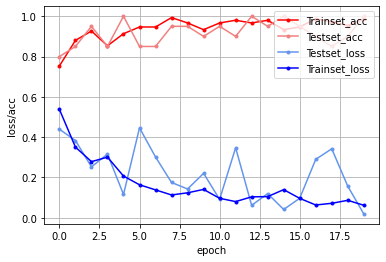

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models,layers,optimizers,metrics
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications import VGG16
np.random.seed(3)
tf.compat.v1.set_random_seed(3)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './train',   # 학습셋이 있는 폴더의 위치
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './test',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary')

transfer_model = VGG16(weights='imagenet',include_top=False,
                       input_shape=(150,150,3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64,activation='relu'))
finetune_model.add(Dense(2,activation='softmax'))
finetune_model.summary()
finetune_model.compile(loss='sparse_categorical_crossentropy',
                       optimizer = optimizers.Adam(learning_rate=0.0002),
                       metrics=['accuracy'])

history = finetune_model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=test_generator,
    validation_steps=4)
                       
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,acc,marker='.',c='red',label='Trainset_acc')
plt.plot(x_len,val_acc,marker='.',c='lightcoral',label='Testset_acc')
plt.plot(x_len,y_vloss,marker='.',c='cornflowerblue',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

# 그래프에 그리드 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()